<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [32]:
# Read CSV
house_csv = "..\..\data\Sacramento_transactions.csv"
df = pd.read_csv(house_csv)

In [3]:
df.shape

(985, 12)

In [4]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [81]:
df["zip"]=df["zip"].astype(str)

In [82]:
# are there any missing values
df.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [83]:
df.sample(10)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
903,2149 COTTAGE WAY,SACRAMENTO,95825,CA,3,1,1285,Residential,Thu May 15 00:00:00 EDT 2008,143012,38.603593,-121.417011
433,624 HOVEY WAY,ROSEVILLE,95678,CA,3,2,1758,Residential,Mon May 19 00:00:00 EDT 2008,217500,38.756149,-121.306479
465,8304 JUGLANS DR,ORANGEVALE,95662,CA,4,2,1574,Residential,Mon May 19 00:00:00 EDT 2008,252155,38.691829,-121.249033
828,1515 EL CAMINO VERDE DR,LINCOLN,95648,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,400000,38.904869,-121.320750
470,361 MAHONIA CIR,SACRAMENTO,95835,CA,4,3,2175,Residential,Mon May 19 00:00:00 EDT 2008,261000,38.676172,-121.509761
925,7342 DAVE ST,SACRAMENTO,95828,CA,3,1,1638,Residential,Thu May 15 00:00:00 EDT 2008,170725,38.490822,-121.401643
243,8164 CHENIN BLANC LN,FAIR OAKS,95628,CA,2,2,1315,Residential,Tue May 20 00:00:00 EDT 2008,230000,38.665644,-121.259969
151,6503 RIO DE ONAR WAY,ELK GROVE,95757,CA,5,4,3508,Residential,Wed May 21 00:00:00 EDT 2008,510000,38.382530,-121.428038
429,6344 LAGUNA MIRAGE LN,ELK GROVE,95758,CA,2,2,1112,Residential,Mon May 19 00:00:00 EDT 2008,213697,38.423963,-121.428875
955,2100 BEATTY WAY,ROSEVILLE,95747,CA,3,2,1371,Residential,Thu May 15 00:00:00 EDT 2008,208250,38.737882,-121.308142


In [108]:
# create new column for distance from centre Sacramento
# 38.5619185, -121.58333
df["d-sac"] = ((df["latitude"] - 38.5619185) ** 2 + (df["longitude"] + 121.58333)**2) ** 0.5
# data set centre is 38.607732, -121.355982
df["d-centre"] = ((df["latitude"] - 38.607732) ** 2 + (df["longitude"] + 121.355982)**2) ** 0.5


In [109]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599
d,985.0,0.269548,0.146226,0.047765,0.164125,0.235348,0.351590,1.008480
d-sac,985.0,0.269548,0.146226,0.047765,0.164125,0.235348,0.351590,1.008480
d-centre,985.0,0.174326,0.099252,0.012496,0.109742,0.158324,0.206928,0.776591


In [87]:
# Number properties in each city
#df.groupby("city").count()["street"]
df['city'].value_counts().sort_values()

FORESTHILL           1
PENRYN               1
GREENWOOD            1
DIAMOND SPRINGS      1
MEADOW VISTA         1
COOL                 1
SHINGLE SPRINGS      1
SLOUGHHOUSE          1
WALNUT GROVE         1
MATHER               1
GARDEN VALLEY        1
LOOMIS               2
EL DORADO            2
POLLOCK PINES        3
RANCHO MURIETA       3
WEST SACRAMENTO      3
GRANITE BAY          3
ELVERTA              4
GOLD RIVER           4
AUBURN               5
WILTON               5
FAIR OAKS            9
CAMERON PARK         9
PLACERVILLE         10
ORANGEVALE          11
RIO LINDA           13
ROCKLIN             17
FOLSOM              17
CARMICHAEL          20
NORTH HIGHLANDS     21
GALT                21
EL DORADO HILLS     23
RANCHO CORDOVA      28
ANTELOPE            33
CITRUS HEIGHTS      35
ROSEVILLE           48
LINCOLN             72
ELK GROVE          114
SACRAMENTO         439
Name: city, dtype: int64

In [79]:
# Number properties in each category
df.groupby("type").count()["street"]

type
Condo            54
Multi-Family     13
Residential     917
Unkown            1
Name: street, dtype: int64

In [135]:
df.corr()["price"]

beds         0.342024
baths        0.416208
sq__ft       0.333897
price        1.000000
latitude    -0.039573
longitude    0.284485
d            0.244155
d-sac        0.244155
d-centre     0.196603
Name: price, dtype: float64

In [136]:
df[df["beds"] !=0].corr()["price"]

beds         0.450966
baths        0.524377
sq__ft       0.361688
price        1.000000
latitude     0.131900
longitude    0.354499
d            0.379388
d-sac        0.379388
d-centre     0.324816
Name: price, dtype: float64

In [138]:
#df[np.logical_and(df["baths"] !=0, df["beds"] != 0, df["sq__ft"] != 0)].corr()["price"]
df[np.logical_and(df["baths"] !=0, df["sq__ft"] != 0)].corr()["price"]

beds         0.441988
baths        0.501820
sq__ft       0.693708
price        1.000000
latitude     0.058475
longitude    0.278312
d            0.313167
d-sac        0.313167
d-centre     0.274315
Name: price, dtype: float64

*** Looking at column:  sq__ft
sq__ft : 171 rows have zero in them ( 17.36 %)
Mean of  sq__ft  is  1314.9167512690356  **inluding ZEROS
Mean of  sq__ft  is  1591.1461916461917  EXCLUDING zeros


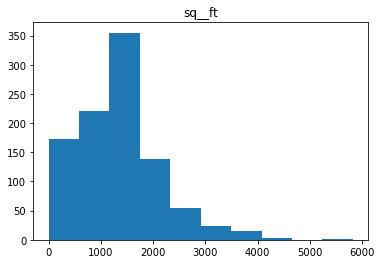

*** Looking at column:  beds
beds : 108 rows have zero in them ( 10.96 %)
Mean of  beds  is  2.9116751269035532  **inluding ZEROS
Mean of  beds  is  3.2702394526795895  EXCLUDING zeros


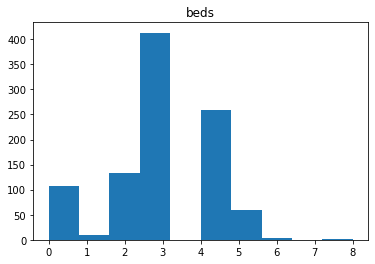

*** Looking at column:  baths
baths : 108 rows have zero in them ( 10.96 %)
Mean of  baths  is  1.7766497461928934  **inluding ZEROS
Mean of  baths  is  1.9954389965792474  EXCLUDING zeros


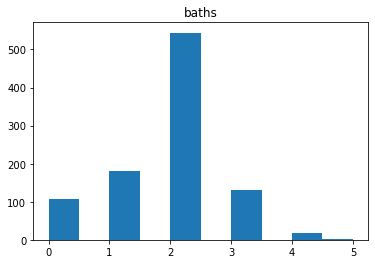

*** Looking at column:  price
price : 0 rows have zero in them ( 0.0 %)
Mean of  price  is  234144.26395939087  **inluding ZEROS
Mean of  price  is  234144.26395939087  EXCLUDING zeros


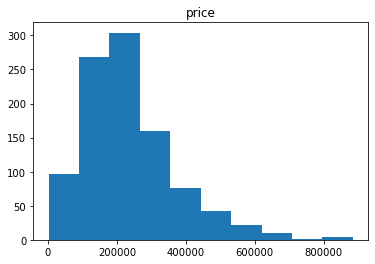

In [12]:
# We know we have problems with beds, baths, sq_ft, price data
def showinfo(df, name):
    print("*** Looking at column: ", name)
    print(name, ":", df[df[name] == 0].shape[0], "rows have zero in them (", round(df[df[name] == 0].shape[0]/df.shape[0]*100,2),"%)")
    print("Mean of ", name, " is ", df[name].mean(), " **inluding ZEROS")
    print("Mean of ", name, " is ", df[df[name] != 0][name].mean(), " EXCLUDING zeros")
    plt.hist(df[name])
    plt.title(name)
    plt.show()
    
showinfo(df, 'sq__ft')
showinfo(df, "beds") 
showinfo(df, "baths")
showinfo(df, "price")


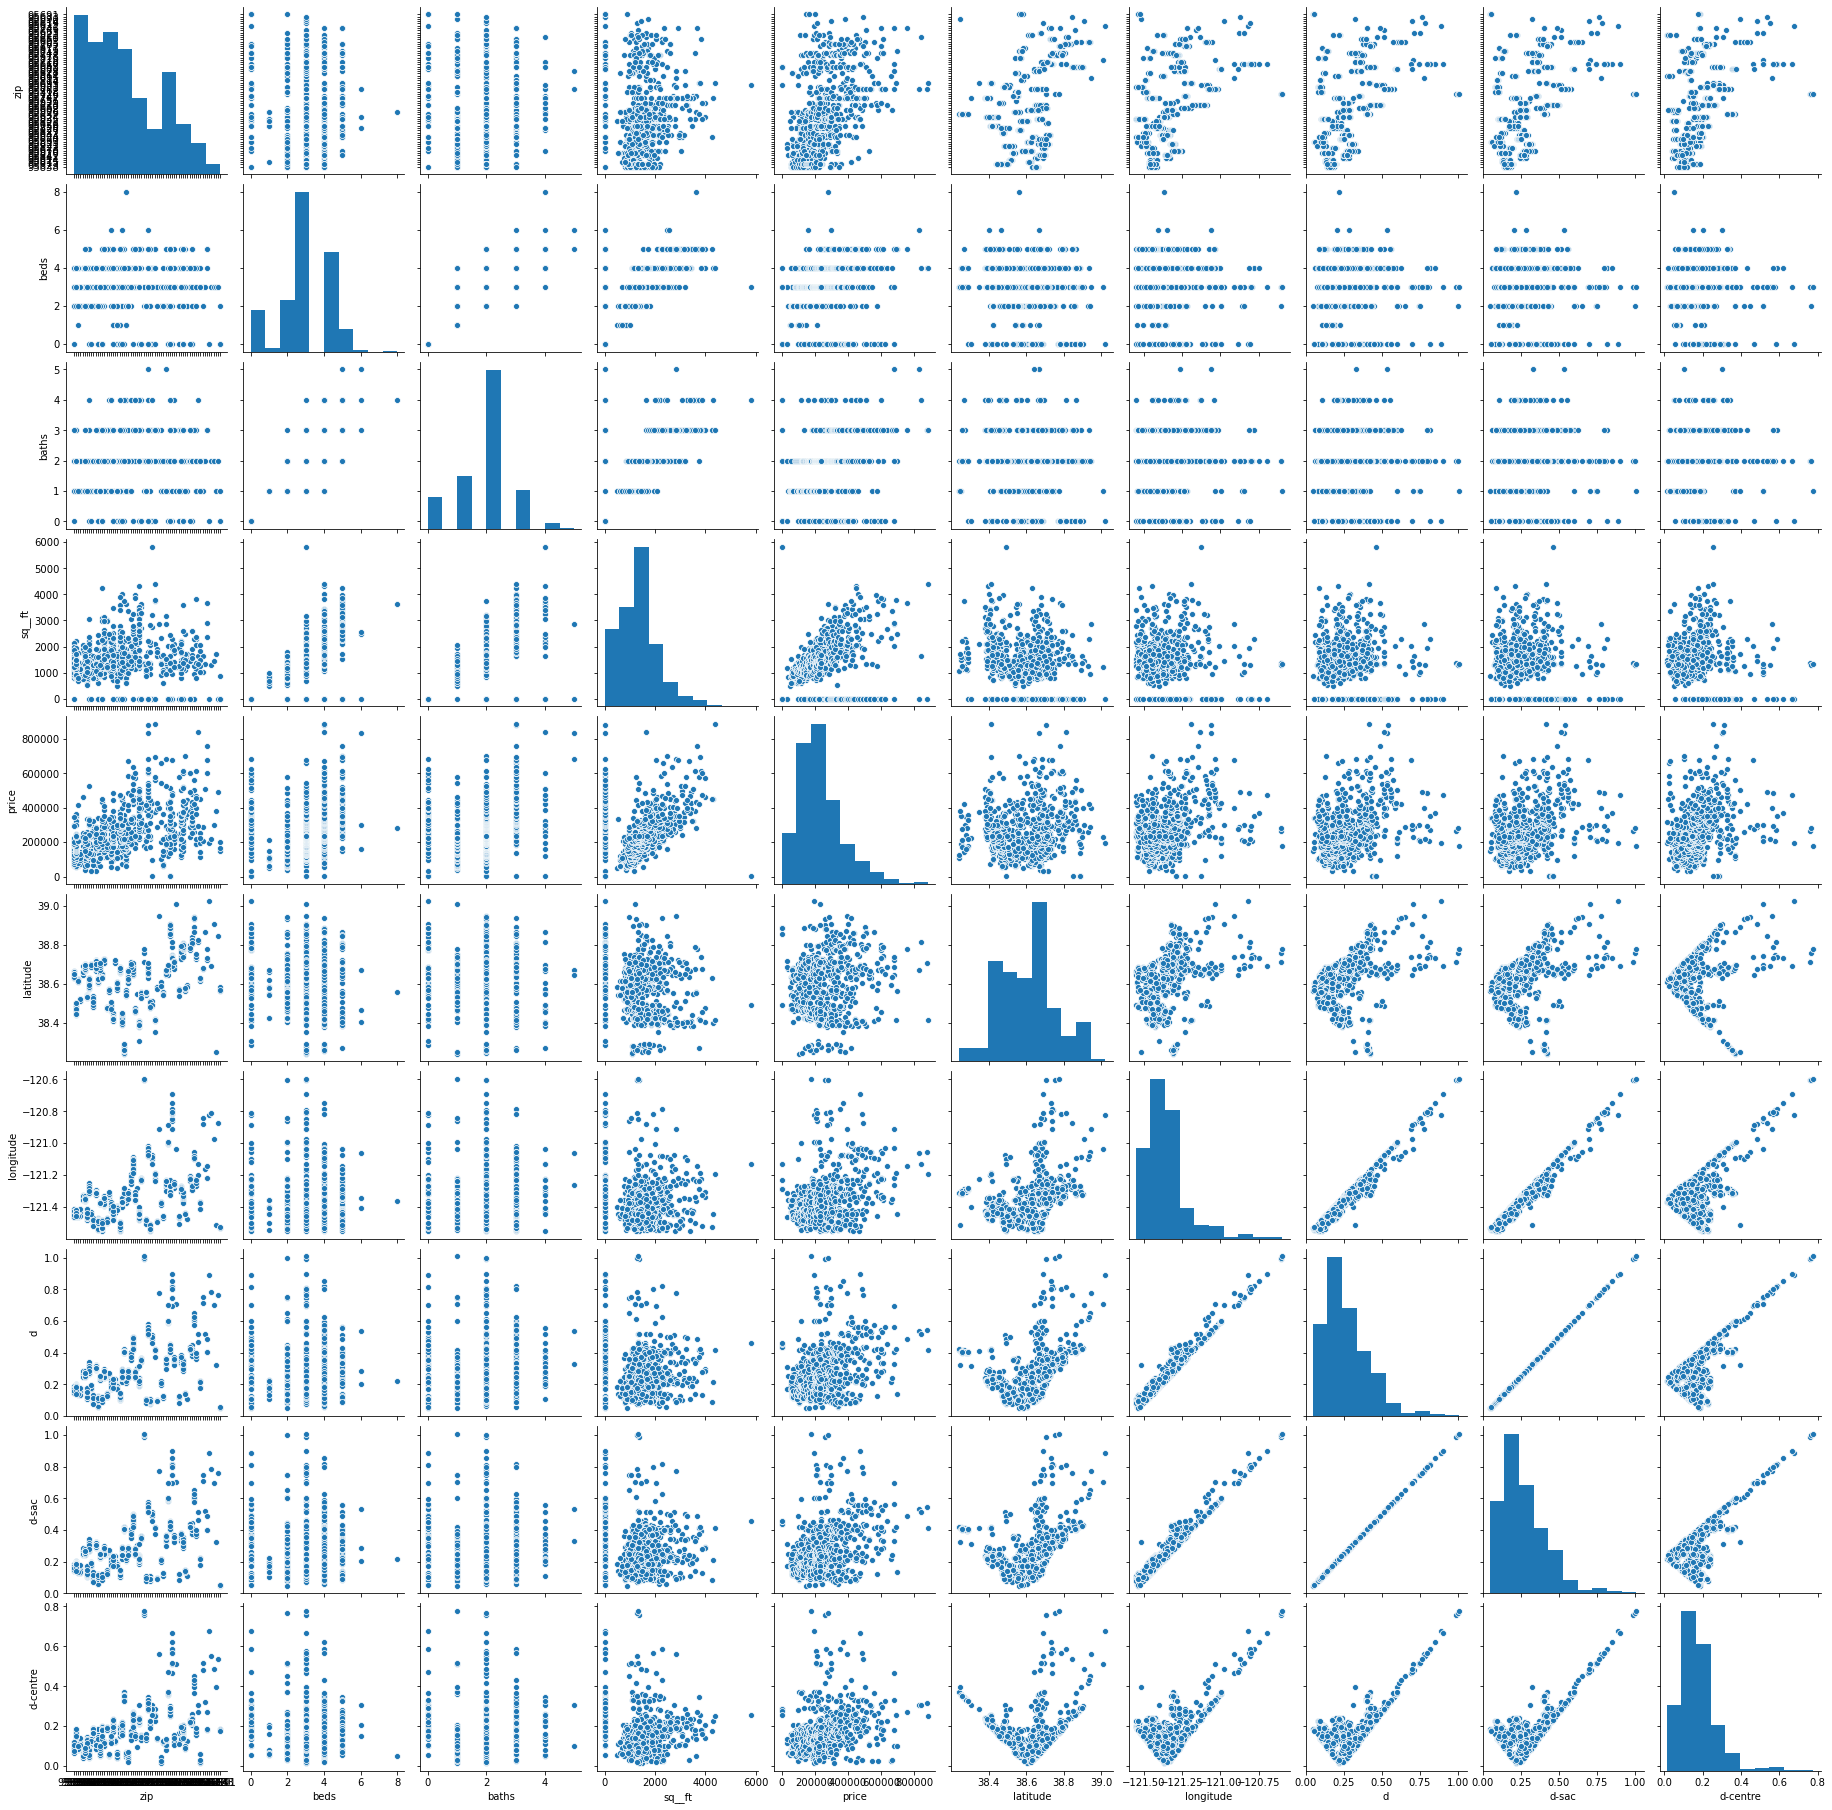

In [110]:
sns.pairplot(df)

In [98]:
# Does ZIP code make a difference to mean price?
print("Price cv ZIP code", df.groupby("city")["price"].mean().sort_values())
print("    std dev = ", df.groupby("city")["price"].mean().std())
print("Size v ZIP code", df.groupby("zip")["sq__ft"].mean())
print("    std dev = ", df.groupby("zip")["sq__ft"].mean().std())


Price cv ZIP code city
SLOUGHHOUSE          2000.000000
LINCOLN             96539.263889
ELVERTA            132866.000000
NORTH HIGHLANDS    135659.333333
WEST SACRAMENTO    170700.000000
RIO LINDA          172727.615385
CITRUS HEIGHTS     187114.914286
FORESTHILL         194818.000000
SACRAMENTO         197735.988610
DIAMOND SPRINGS    216033.000000
MEADOW VISTA       230000.000000
ANTELOPE           232496.393939
GALT               236943.428571
MATHER             237800.000000
POLLOCK PINES      240302.666667
EL DORADO          247000.000000
RANCHO CORDOVA     263405.928571
CAMERON PARK       267944.444444
ELK GROVE          271157.692982
SHINGLE SPRINGS    275000.000000
ORANGEVALE         279159.545455
CARMICHAEL         295684.750000
RANCHO MURIETA     297750.000000
COOL               300000.000000
FAIR OAKS          303500.666667
ROSEVILLE          324528.250000
GOLD RIVER         358000.000000
PLACERVILLE        363863.400000
WALNUT GROVE       380000.000000
ROCKLIN            3

In [ ]:
# Yes, postcode makes a big difference (look at Std Dev across post codes)

In [111]:
# Lets do some data fixup
#
# First BATHS to be average number of baths
ndf = df.copy()
ndf.sample(10)


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,d,d-sac,d-centre
131,4143 SEA MEADOW WAY,SACRAMENTO,95823,CA,4,3,1915,Residential,Wed May 21 00:00:00 EDT 2008,351300,38.465340,-121.457519,0.158606,0.158606,0.174886
815,7709 RIVER VILLAGE DR,SACRAMENTO,95831,CA,3,2,1795,Residential,Fri May 16 00:00:00 EDT 2008,351000,38.483212,-121.540190,0.089754,0.089754,0.222346
627,7328 SPRINGMAN ST,SACRAMENTO,95822,CA,3,2,1164,Residential,Fri May 16 00:00:00 EDT 2008,122500,38.491991,-121.477636,0.126732,0.126732,0.167916
599,15 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885571,-121.289421,0.437188,0.437188,0.285701
923,7351 GIGI PL,SACRAMENTO,95828,CA,4,2,1859,Multi-Family,Thu May 15 00:00:00 EDT 2008,170000,38.490606,-121.410173,0.187267,0.187267,0.129055
880,6208 GRATTAN WAY,NORTH HIGHLANDS,95660,CA,3,1,1051,Residential,Thu May 15 00:00:00 EDT 2008,105000,38.679279,-121.376615,0.237707,0.237707,0.074463
334,3935 EL MONTE DR,LOOMIS,95650,CA,4,4,1624,Residential,Tue May 20 00:00:00 EDT 2008,839000,38.813337,-121.133348,0.515456,0.515456,0.303050
37,7661 NIXOS WAY,SACRAMENTO,95823,CA,4,2,1472,Residential,Wed May 21 00:00:00 EDT 2008,148750,38.479553,-121.463317,0.145558,0.145558,0.167185
273,3578 LOGGERHEAD WAY,SACRAMENTO,95834,CA,4,2,2169,Residential,Tue May 20 00:00:00 EDT 2008,292000,38.633028,-121.526755,0.090870,0.090870,0.172636
84,9186 KINBRACE CT,SACRAMENTO,95829,CA,4,3,2235,Residential,Wed May 21 00:00:00 EDT 2008,236685,38.463355,-121.358936,0.245087,0.245087,0.144407


In [113]:
#df['Event'].mask(df['Event'] == 'Hip-Hop', 'Jazz', inplace=True)
m = ndf["baths"].mean()
ndf["baths"].mask(ndf["baths"] == 0, np.nan, inplace=True)
ndf["sq__ft"].mask(ndf["sq__ft"] == 0, np.nan, inplace=True)
ndf["beds"].mask(ndf["beds"] == 0, np.nan, inplace=True)
ndf.sample(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,d,d-sac,d-centre
576,27 E ST,LINCOLN,95648,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885173,-121.290270,0.436323,0.436323,0.285117
277,405 MARLIN SPIKE WAY,SACRAMENTO,95838,CA,3.0,2.0,1411.0,Residential,Tue May 20 00:00:00 EDT 2008,296769,38.657830,-121.456842,0.158740,0.158740,0.112617
895,4071 EVALITA WAY,SACRAMENTO,95823,CA,3.0,2.0,1089.0,Residential,Thu May 15 00:00:00 EDT 2008,129500,38.466388,-121.458861,0.156903,0.156903,0.174821
914,8321 MISTLETOE WAY,CITRUS HEIGHTS,95621,CA,4.0,2.0,1381.0,Residential,Thu May 15 00:00:00 EDT 2008,161250,38.717738,-121.308322,0.316084,0.316084,0.119887
596,27 CRYSTALWOOD CIR,LINCOLN,95648,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.884985,-121.289399,0.436769,0.436769,0.285136


In [114]:
ndf.describe()

,beds,baths,sq__ft,price,latitude,longitude,d,d-sac,d-centre
count,877.000000,877.000000,814.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,3.270239,1.995439,1591.146192,234144.263959,38.607732,-121.355982,0.269548,0.269548,0.174326
std,0.864675,0.680771,663.841930,138365.839085,0.145433,0.138278,0.146226,0.146226,0.099252
min,1.000000,1.000000,484.000000,1551.000000,38.241514,-121.551704,0.047765,0.047765,0.012496
25%,3.000000,2.000000,1144.000000,145000.000000,38.482717,-121.446127,0.164125,0.164125,0.109742
50%,3.000000,2.000000,1418.500000,213750.000000,38.626582,-121.376220,0.235348,0.235348,0.158324
75%,4.000000,2.000000,1851.000000,300000.000000,38.695589,-121.295778,0.351590,0.351590,0.206928
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599,1.008480,1.008480,0.776591


In [115]:
df.corr()["price"]

beds         0.342024
baths        0.416208
sq__ft       0.333897
price        1.000000
latitude    -0.039573
longitude    0.284485
d            0.244155
d-sac        0.244155
d-centre     0.196603
Name: price, dtype: float64

In [116]:
ndf.corr()["price"]

beds         0.450966
baths        0.524377
sq__ft       0.693708
price        1.000000
latitude    -0.039573
longitude    0.284485
d            0.244155
d-sac        0.244155
d-centre     0.196603
Name: price, dtype: float64

In [117]:
ndf.corr()

,beds,baths,sq__ft,price,latitude,longitude,d,d-sac,d-centre
beds,1.000000,0.659514,0.695710,0.450966,-0.055823,0.077586,0.107993,0.107993,0.113542
baths,0.659514,1.000000,0.724631,0.524377,-0.004684,0.156539,0.204138,0.204138,0.221088
sq__ft,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809,0.179952,0.179952,0.227557
price,0.450966,0.524377,0.693708,1.000000,-0.039573,0.284485,0.244155,0.244155,0.196603
latitude,-0.055823,-0.004684,-0.103287,-0.039573,1.000000,0.387925,0.460326,0.460326,0.147940
longitude,0.077586,0.156539,0.135809,0.284485,0.387925,1.000000,0.962077,0.962077,0.618747
d,0.107993,0.204138,0.179952,0.244155,0.460326,0.962077,1.000000,1.000000,0.721055
d-sac,0.107993,0.204138,0.179952,0.244155,0.460326,0.962077,1.000000,1.000000,0.721055
d-centre,0.113542,0.221088,0.227557,0.196603,0.147940,0.618747,0.721055,0.721055,1.000000


In [ ]:
#Looking at output, we se that beds, baths and sq__ft are quicte highly correalted
#
# So we only need to do LR on ONE of these - sq__ft since most correlated to price
#
# Second variable might be d-sac (distance from centre)

In [124]:
from sklearn import linear_model

#
# First split our data
from sklearn.model_selection import train_test_split
X = df[['sq__ft', 'beds', 'baths']] #.values.reshape(-3,1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#
# Train our model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 118248.61054951875
Coefficients: 
 [ 1.02832696e+01 -8.41541318e+03  6.79192355e+04]


In [125]:
# Test our model
c0 = regr.coef_[0]
c1 = regr.coef_[1]
c2 = regr.coef_[2]
#X_test
y_new = regr.intercept_ + X_test['sq__ft']*c0 + X_test['beds']*c1 + X_test['baths']*c2
#y_new
diff = y_test - y_new
diff

613   -101653.661922
451   -136343.234753
731     -8045.616913
436    -85227.270102
275     49449.605358
           ...      
697     24968.379954
797     85159.758218
328    251602.202856
525     98645.718621
971     52383.793134
Length: 326, dtype: float64

In [126]:
regr.score(X_train,y_train)

0.17680101409198667

In [128]:
regr.score(X_test,y_test)

0.1690311653159038

In [129]:
#
# Let's try with just sq__ft and d-sec
from sklearn.model_selection import train_test_split
X2 = df[['sq__ft', 'd-sac']] #.values.reshape(-3,1)
y2 = df['price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

#
# Train our model
regr = linear_model.LinearRegression()
regr.fit(X2_train,y2_train)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 62863.4767528979
Coefficients: 
 [6.08546146e+01 3.21660311e+05]


In [131]:
# Test our model
c0 = regr.coef_[0]
c1 = regr.coef_[1]
#X_test
y2_new = regr.intercept_ + X2_test['sq__ft']*c0 + X2_test['d-sac']*c1
#y_new
diff = y2_test - y2_new
diff

613   -100720.282361
451    -70996.082935
731     -2305.764795
436    -18687.801709
275     27841.841888
           ...      
697   -161879.261714
797     14681.076714
328    174839.950203
525    135711.250649
971     27843.666307
Length: 326, dtype: float64

In [133]:
regr.score(X2_train,y2_train)

0.2155989781285158

In [132]:
regr.score(X2_test,y2_test)

0.21148031878543883


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [ ]:
# ANSWER

#### 2.2 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [ ]:
# ANSWER

#### 2.3 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [ ]:
from sklearn.linear_model import LinearRegression

##### 2.3.1 Fit predictor and target variables using linear regression 

In [ ]:
# ANSWER

X = data['sq__ft'].values.reshape(-1,1)
Y = data['price']

##### 2.3.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [ ]:
# ANSWER

### 3. Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [ ]:
# ANSWER
## Create training and testing subsets

#### 3.2 Check Shape, Sample of Test Train Data

In [ ]:
# ANSWER
## Check training/test data

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using x_test, y_test

In [ ]:
# ANSWER

In [ ]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [ ]:
# ANSWER



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



